In [1]:
import pandas as pd
import numpy as np
import os
forders = os.listdir('../data/서울_연립다세대_매매')
df_all_years = pd.DataFrame()
for i in range(1,len(forders)):
    path = '../data\\서울_연립다세대_매매\\'+forders[i]
    df= pd.read_csv(path, header=15,encoding='cp949',thousands = ',') 
    df_all_years = pd.concat([df_all_years, df])
df_all_years = df_all_years.reset_index()
df = df_all_years.drop(['index'],axis=1)

# 1. 데이터 파악

In [2]:
df.head()

,시군구,번지,본번,부번,건물명,전용면적(㎡),대지권면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일
0,서울특별시 강남구 개포동,170-18,170,18,(170-18),26.60,21.53,201007,13,29350,1,1988.0,선릉로12길 17,NaN
1,서울특별시 강남구 개포동,1219-11,1219,11,강남하이츠,39.90,19.33,201001,22,21500,1,1993.0,개포로20길 35,NaN
2,서울특별시 강남구 개포동,1202-2,1202,2,경모하이츠,51.69,21.20,201003,12,28500,1,1991.0,개포로22길 41-6,NaN
3,서울특별시 강남구 개포동,1235-16,1235,16,광현빌라,62.76,34.53,201001,22,36500,2,2001.0,논현로18길 10-13,NaN
4,서울특별시 강남구 개포동,1235-16,1235,16,광현빌라,77.34,42.55,201011,2,44200,4,2001.0,논현로18길 10-13,NaN


In [3]:
df.tail()

,시군구,번지,본번,부번,건물명,전용면적(㎡),대지권면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일
493350,서울특별시 중랑구 중화동,86-9,86,9,화수분빌리지(105),55.58,27.57,202103,4,17000,2,2003.0,봉화산로21길 15,NaN
493351,서울특별시 중랑구 중화동,307-4,307,4,화인하우스(307-4),54.32,27.24,202102,17,38800,7,2017.0,동일로139가길 22,NaN
493352,서울특별시 중랑구 중화동,307-4,307,4,화인하우스(307-4),56.51,28.34,202102,19,38000,5,2017.0,동일로139가길 22,NaN
493353,서울특별시 중랑구 중화동,15-2,15,2,휴렉스빌,29.44,18.14,202104,6,17500,4,2016.0,봉화산로27다길 6,NaN
493354,서울특별시 중랑구 중화동,15-2,15,2,휴렉스빌,29.27,18.14,202106,8,18500,3,2016.0,봉화산로27다길 6,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493355 entries, 0 to 493354
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   시군구       493355 non-null  object 
 1   번지        493321 non-null  object 
 2   본번        493355 non-null  int64  
 3   부번        493355 non-null  int64  
 4   건물명       493355 non-null  object 
 5   전용면적(㎡)   493355 non-null  float64
 6   대지권면적(㎡)  493355 non-null  float64
 7   계약년월      493355 non-null  int64  
 8   계약일       493355 non-null  int64  
 9   거래금액(만원)  493355 non-null  int64  
 10  층         493355 non-null  int64  
 11  건축년도      493334 non-null  float64
 12  도로명       493355 non-null  object 
 13  해제사유발생일   4464 non-null    float64
dtypes: float64(4), int64(6), object(4)
memory usage: 52.7+ MB


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493355 entries, 0 to 493354
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   시군구       493355 non-null  object 
 1   번지        493321 non-null  object 
 2   본번        493355 non-null  int64  
 3   부번        493355 non-null  int64  
 4   건물명       493355 non-null  object 
 5   전용면적(㎡)   493355 non-null  float64
 6   대지권면적(㎡)  493355 non-null  float64
 7   계약년월      493355 non-null  int64  
 8   계약일       493355 non-null  int64  
 9   거래금액(만원)  493355 non-null  int64  
 10  층         493355 non-null  int64  
 11  건축년도      493334 non-null  float64
 12  도로명       493355 non-null  object 
 13  해제사유발생일   4464 non-null    float64
dtypes: float64(4), int64(6), object(4)
memory usage: 52.7+ MB


# 2. 데이터 전처리

## 2-1. 주소처리

In [6]:
df['동_건물명'] = df['시군구'].str.split(" ", expand = True)[2] + '_' + df['건물명'].str.strip()
df.head()

,시군구,번지,본번,부번,건물명,전용면적(㎡),대지권면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,동_건물명
0,서울특별시 강남구 개포동,170-18,170,18,(170-18),26.60,21.53,201007,13,29350,1,1988.0,선릉로12길 17,NaN,개포동_(170-18)
1,서울특별시 강남구 개포동,1219-11,1219,11,강남하이츠,39.90,19.33,201001,22,21500,1,1993.0,개포로20길 35,NaN,개포동_강남하이츠
2,서울특별시 강남구 개포동,1202-2,1202,2,경모하이츠,51.69,21.20,201003,12,28500,1,1991.0,개포로22길 41-6,NaN,개포동_경모하이츠
3,서울특별시 강남구 개포동,1235-16,1235,16,광현빌라,62.76,34.53,201001,22,36500,2,2001.0,논현로18길 10-13,NaN,개포동_광현빌라
4,서울특별시 강남구 개포동,1235-16,1235,16,광현빌라,77.34,42.55,201011,2,44200,4,2001.0,논현로18길 10-13,NaN,개포동_광현빌라


In [7]:
df['동_건물명'].value_counts()

궁동_우신빌라          405
시흥동_현대빌라         199
일원동_다세대주택        167
성내동_서도휴빌         167
고척동_조양휴캐슬        165
                ... 
신림동_(316-3)        1
신림동_(652-124)      1
신림동_(661-69)       1
신림동_(90-69)        1
중화동_한양주택           1
Name: 동_건물명, Length: 76445, dtype: int64

In [8]:
df = df.drop(['본번','부번','번지','건물명','해제사유발생일','도로명'],axis = 1)
df.head()

,시군구,전용면적(㎡),대지권면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,동_건물명
0,서울특별시 강남구 개포동,26.60,21.53,201007,13,29350,1,1988.0,개포동_(170-18)
1,서울특별시 강남구 개포동,39.90,19.33,201001,22,21500,1,1993.0,개포동_강남하이츠
2,서울특별시 강남구 개포동,51.69,21.20,201003,12,28500,1,1991.0,개포동_경모하이츠
3,서울특별시 강남구 개포동,62.76,34.53,201001,22,36500,2,2001.0,개포동_광현빌라
4,서울특별시 강남구 개포동,77.34,42.55,201011,2,44200,4,2001.0,개포동_광현빌라


## 2-2. 면적 및 용적률

In [9]:
df.rename(columns = {'거래금액(만원)':'거래금액',
                    '전용면적(㎡)':'전용면적',
                     '대지권면적(㎡)':'대지권면적'
                    }, inplace = True)
df.head()

,시군구,전용면적,대지권면적,계약년월,계약일,거래금액,층,건축년도,동_건물명
0,서울특별시 강남구 개포동,26.60,21.53,201007,13,29350,1,1988.0,개포동_(170-18)
1,서울특별시 강남구 개포동,39.90,19.33,201001,22,21500,1,1993.0,개포동_강남하이츠
2,서울특별시 강남구 개포동,51.69,21.20,201003,12,28500,1,1991.0,개포동_경모하이츠
3,서울특별시 강남구 개포동,62.76,34.53,201001,22,36500,2,2001.0,개포동_광현빌라
4,서울특별시 강남구 개포동,77.34,42.55,201011,2,44200,4,2001.0,개포동_광현빌라


In [10]:
df['거래금액'] = df['거래금액'] * 10000
df['공급면적'] = df['전용면적'] + df['대지권면적']
df.head()

,시군구,전용면적,대지권면적,계약년월,계약일,거래금액,층,건축년도,동_건물명,공급면적
0,서울특별시 강남구 개포동,26.60,21.53,201007,13,293500000,1,1988.0,개포동_(170-18),48.13
1,서울특별시 강남구 개포동,39.90,19.33,201001,22,215000000,1,1993.0,개포동_강남하이츠,59.23
2,서울특별시 강남구 개포동,51.69,21.20,201003,12,285000000,1,1991.0,개포동_경모하이츠,72.89
3,서울특별시 강남구 개포동,62.76,34.53,201001,22,365000000,2,2001.0,개포동_광현빌라,97.29
4,서울특별시 강남구 개포동,77.34,42.55,201011,2,442000000,4,2001.0,개포동_광현빌라,119.89


In [11]:
#용적률(容積率)은 건축 용어로 전체 대지면적에 대한 건물 연면적의 비율을 뜻하며 백분율로 표시
#용적률 = (건물 연면적 m² / 대지면적 m² ) × 100 (%)
df['용적률'] = (df['전용면적'] / df['공급면적']) * 100
df.head()

,시군구,전용면적,대지권면적,계약년월,계약일,거래금액,층,건축년도,동_건물명,공급면적,용적률
0,서울특별시 강남구 개포동,26.60,21.53,201007,13,293500000,1,1988.0,개포동_(170-18),48.13,55.266985
1,서울특별시 강남구 개포동,39.90,19.33,201001,22,215000000,1,1993.0,개포동_강남하이츠,59.23,67.364511
2,서울특별시 강남구 개포동,51.69,21.20,201003,12,285000000,1,1991.0,개포동_경모하이츠,72.89,70.915078
3,서울특별시 강남구 개포동,62.76,34.53,201001,22,365000000,2,2001.0,개포동_광현빌라,97.29,64.508171
4,서울특별시 강남구 개포동,77.34,42.55,201011,2,442000000,4,2001.0,개포동_광현빌라,119.89,64.509133


## 2-3. 거래날짜

In [12]:
df['매물구분'] = df['동_건물명'] + '_' + df['전용면적'].astype(str)
df.head()

,시군구,전용면적,대지권면적,계약년월,계약일,거래금액,층,건축년도,동_건물명,공급면적,용적률,매물구분
0,서울특별시 강남구 개포동,26.60,21.53,201007,13,293500000,1,1988.0,개포동_(170-18),48.13,55.266985,개포동_(170-18)_26.6
1,서울특별시 강남구 개포동,39.90,19.33,201001,22,215000000,1,1993.0,개포동_강남하이츠,59.23,67.364511,개포동_강남하이츠_39.9
2,서울특별시 강남구 개포동,51.69,21.20,201003,12,285000000,1,1991.0,개포동_경모하이츠,72.89,70.915078,개포동_경모하이츠_51.69
3,서울특별시 강남구 개포동,62.76,34.53,201001,22,365000000,2,2001.0,개포동_광현빌라,97.29,64.508171,개포동_광현빌라_62.76
4,서울특별시 강남구 개포동,77.34,42.55,201011,2,442000000,4,2001.0,개포동_광현빌라,119.89,64.509133,개포동_광현빌라_77.34


In [13]:
df['매물구분'].nunique()

210090

In [14]:
df['전용면적별_거래금액'] = df['거래금액']/df['전용면적']
df['전용면적별_거래금액'] = df.groupby(df['매물구분'])['전용면적별_거래금액'].shift(1)

df['공급면적별_거래금액'] = df['거래금액']/df['공급면적']
df['공급면적별_거래금액'] = df.groupby(df['매물구분'])['공급면적별_거래금액'].shift(1)

df['전용면적별_거래금액'] = df['전용면적별_거래금액'] * df['전용면적']
df['공급면적별_거래금액'] = df['공급면적별_거래금액'] * df['공급면적']
df['최종거래월'] = df.groupby(['매물구분'])['계약년월'].shift(1) #shift쓴 이유: df에 컬럼을 넣기위해 행을 맞춰줌
df['최종거래기간_월'] = df['계약년월'] - df['최종거래월']
df.head()

,시군구,전용면적,대지권면적,계약년월,계약일,거래금액,층,건축년도,동_건물명,공급면적,용적률,매물구분,전용면적별_거래금액,공급면적별_거래금액,최종거래월,최종거래기간_월
0,서울특별시 강남구 개포동,26.60,21.53,201007,13,293500000,1,1988.0,개포동_(170-18),48.13,55.266985,개포동_(170-18)_26.6,NaN,NaN,NaN,NaN
1,서울특별시 강남구 개포동,39.90,19.33,201001,22,215000000,1,1993.0,개포동_강남하이츠,59.23,67.364511,개포동_강남하이츠_39.9,NaN,NaN,NaN,NaN
2,서울특별시 강남구 개포동,51.69,21.20,201003,12,285000000,1,1991.0,개포동_경모하이츠,72.89,70.915078,개포동_경모하이츠_51.69,NaN,NaN,NaN,NaN
3,서울특별시 강남구 개포동,62.76,34.53,201001,22,365000000,2,2001.0,개포동_광현빌라,97.29,64.508171,개포동_광현빌라_62.76,NaN,NaN,NaN,NaN
4,서울특별시 강남구 개포동,77.34,42.55,201011,2,442000000,4,2001.0,개포동_광현빌라,119.89,64.509133,개포동_광현빌라_77.34,NaN,NaN,NaN,NaN


In [15]:
df['건물노후도'] = df['계약년월'] // 100 - df['건축년도']
df.head()

,시군구,전용면적,대지권면적,계약년월,계약일,거래금액,층,건축년도,동_건물명,공급면적,용적률,매물구분,전용면적별_거래금액,공급면적별_거래금액,최종거래월,최종거래기간_월,건물노후도
0,서울특별시 강남구 개포동,26.60,21.53,201007,13,293500000,1,1988.0,개포동_(170-18),48.13,55.266985,개포동_(170-18)_26.6,NaN,NaN,NaN,NaN,22.0
1,서울특별시 강남구 개포동,39.90,19.33,201001,22,215000000,1,1993.0,개포동_강남하이츠,59.23,67.364511,개포동_강남하이츠_39.9,NaN,NaN,NaN,NaN,17.0
2,서울특별시 강남구 개포동,51.69,21.20,201003,12,285000000,1,1991.0,개포동_경모하이츠,72.89,70.915078,개포동_경모하이츠_51.69,NaN,NaN,NaN,NaN,19.0
3,서울특별시 강남구 개포동,62.76,34.53,201001,22,365000000,2,2001.0,개포동_광현빌라,97.29,64.508171,개포동_광현빌라_62.76,NaN,NaN,NaN,NaN,9.0
4,서울특별시 강남구 개포동,77.34,42.55,201011,2,442000000,4,2001.0,개포동_광현빌라,119.89,64.509133,개포동_광현빌라_77.34,NaN,NaN,NaN,NaN,9.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493355 entries, 0 to 493354
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   시군구         493355 non-null  object 
 1   전용면적        493355 non-null  float64
 2   대지권면적       493355 non-null  float64
 3   계약년월        493355 non-null  int64  
 4   계약일         493355 non-null  int64  
 5   거래금액        493355 non-null  int64  
 6   층           493355 non-null  int64  
 7   건축년도        493334 non-null  float64
 8   동_건물명       493355 non-null  object 
 9   공급면적        493355 non-null  float64
 10  용적률         493355 non-null  float64
 11  매물구분        493355 non-null  object 
 12  전용면적별_거래금액  283265 non-null  float64
 13  공급면적별_거래금액  283265 non-null  float64
 14  최종거래월       283265 non-null  float64
 15  최종거래기간_월    283265 non-null  float64
 16  건물노후도       493334 non-null  float64
dtypes: float64(10), int64(4), object(3)
memory usage: 64.0+ MB


In [17]:
df.shape

(493355, 17)

## 2-4 결측값이 포함된 행 drop

In [18]:
df.dropna(inplace=True)
df.shape

(283254, 17)

In [20]:
df.head()

,시군구,전용면적,대지권면적,계약년월,계약일,거래금액,층,건축년도,동_건물명,공급면적,용적률,매물구분,전용면적별_거래금액,공급면적별_거래금액,최종거래월,최종거래기간_월,건물노후도
18,서울특별시 강남구 개포동,69.13,30.93,201012,15,408000000,3,2003.0,개포동_다원하모니빌,100.06,69.088547,개포동_다원하모니빌_69.13,420000000.0,420000000.0,201001.0,11.0,7.0
20,서울특별시 강남구 개포동,51.54,27.10,201011,25,310000000,1,1997.0,개포동_대림빌리지,78.64,65.539166,개포동_대림빌리지_51.54,297000000.0,297000000.0,201001.0,10.0,13.0
35,서울특별시 강남구 개포동,44.28,33.60,201006,10,370000000,2,2002.0,개포동_베네스트빌,77.88,56.856703,개포동_베네스트빌_44.28,410000000.0,410000000.0,201002.0,4.0,8.0
37,서울특별시 강남구 개포동,60.96,57.09,201001,26,530000000,2,1989.0,개포동_비룡빌라,118.05,51.639136,개포동_비룡빌라_60.96,540000000.0,540000000.0,201001.0,0.0,21.0
39,서울특별시 강남구 개포동,60.96,57.09,201008,7,450000000,3,1989.0,개포동_비룡빌라,118.05,51.639136,개포동_비룡빌라_60.96,530000000.0,530000000.0,201001.0,7.0,21.0


# 범주형 데이터 변환 

In [22]:
df['구'] = df['시군구'].str.split(" ", expand = True)[1] 
df.head()

,시군구,전용면적,대지권면적,계약년월,계약일,거래금액,층,건축년도,동_건물명,공급면적,용적률,매물구분,전용면적별_거래금액,공급면적별_거래금액,최종거래월,최종거래기간_월,건물노후도,구
18,서울특별시 강남구 개포동,69.13,30.93,201012,15,408000000,3,2003.0,개포동_다원하모니빌,100.06,69.088547,개포동_다원하모니빌_69.13,420000000.0,420000000.0,201001.0,11.0,7.0,강남구
20,서울특별시 강남구 개포동,51.54,27.10,201011,25,310000000,1,1997.0,개포동_대림빌리지,78.64,65.539166,개포동_대림빌리지_51.54,297000000.0,297000000.0,201001.0,10.0,13.0,강남구
35,서울특별시 강남구 개포동,44.28,33.60,201006,10,370000000,2,2002.0,개포동_베네스트빌,77.88,56.856703,개포동_베네스트빌_44.28,410000000.0,410000000.0,201002.0,4.0,8.0,강남구
37,서울특별시 강남구 개포동,60.96,57.09,201001,26,530000000,2,1989.0,개포동_비룡빌라,118.05,51.639136,개포동_비룡빌라_60.96,540000000.0,540000000.0,201001.0,0.0,21.0,강남구
39,서울특별시 강남구 개포동,60.96,57.09,201008,7,450000000,3,1989.0,개포동_비룡빌라,118.05,51.639136,개포동_비룡빌라_60.96,530000000.0,530000000.0,201001.0,7.0,21.0,강남구


# One-Hot-Encoding

In [25]:
df_cat = pd.get_dummies(df['구'], drop_first=True) #drop_first: 인코딩된 컬럼등 중 제일 첫번째는 삭제 => 다 0 인 행이 첫번째 컬럼이 됨
df_cat

,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
493350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
493352,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
493353,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
df.drop(['시군구','동_건물명','매물구분','구'],axis=1, inplace=True)
df = pd.concat([df,df_cat], axis = 1 )
df.head()

,전용면적,대지권면적,계약년월,계약일,거래금액,층,건축년도,공급면적,용적률,전용면적별_거래금액,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
18,69.13,30.93,201012,15,408000000,3,2003.0,100.06,69.088547,420000000.0,...,0,0,0,0,0,0,0,0,0,0
20,51.54,27.10,201011,25,310000000,1,1997.0,78.64,65.539166,297000000.0,...,0,0,0,0,0,0,0,0,0,0
35,44.28,33.60,201006,10,370000000,2,2002.0,77.88,56.856703,410000000.0,...,0,0,0,0,0,0,0,0,0,0
37,60.96,57.09,201001,26,530000000,2,1989.0,118.05,51.639136,540000000.0,...,0,0,0,0,0,0,0,0,0,0
39,60.96,57.09,201008,7,450000000,3,1989.0,118.05,51.639136,530000000.0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df.isna().sum()

전용면적          0
대지권면적         0
계약년월          0
계약일           0
거래금액          0
층             0
건축년도          0
공급면적          0
용적률           0
전용면적별_거래금액    0
공급면적별_거래금액    0
최종거래월         0
최종거래기간_월      0
건물노후도         0
강동구           0
강북구           0
강서구           0
관악구           0
광진구           0
구로구           0
금천구           0
노원구           0
도봉구           0
동대문구          0
동작구           0
마포구           0
서대문구          0
서초구           0
성동구           0
성북구           0
송파구           0
양천구           0
영등포구          0
용산구           0
은평구           0
종로구           0
중구            0
중랑구           0
dtype: int64

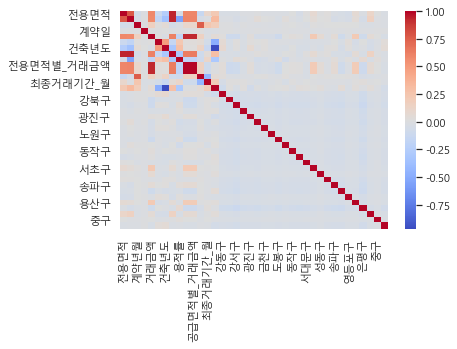

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr(method='pearson')
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
plt.rc('font', family = 'Malgun Gothic')
sns.heatmap(corr,annot=False, cmap = 'coolwarm')
plt.show()

# Splitting Train/Test set

In [35]:
X = df.drop('거래금액',axis=1)
y = df['거래금액']

In [36]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)  
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(198277, 37)
(84977, 37)
(198277,)
(84977,)


# 로그로 정규분포화

C:\Users\wlgns\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='거래금액', ylabel='Density'>

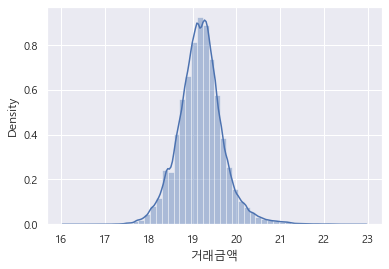

In [37]:
y_train = np.log1p(y_train)
sns.distplot(y_train)

In [41]:
from sklearn import metrics
from xgboost import XGBRegressor

In [42]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
y_pred = xgb.predict(X_test)

In [45]:
y_pred = np.expm1(xgb.predict(X_test))

In [46]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
mae = metrics.mean_absolute_error(y_test,y_pred)
r2  = metrics.r2_score(y_test,y_pred)
print("RMSE: %.4f, MAE: %.4f, R-squared:%.4f"%(rmse,mae,r2))

RMSE: 59597698.8279, MAE: 25271527.4081, R-squared:0.9077


In [57]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
X = df.drop('거래금액',axis=1)
y = df['거래금액']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)  

xgb = XGBClassifier(random_state=100)
gb = GradientBoostingClassifier(random_state=100)
rf = RandomForestClassifier(random_state=100)

xgb_cross = cross_val_score(xgb, X, y, cv=5, verbose=1)
gb_cross = cross_val_score(gb, X, y, cv=5, verbose=1)
rf_cross = cross_val_score(rf, X, y, cv=5, verbose=1)

for count, accuracy in enumerate(xgb_cross):
    print('XGB {}번째 accuracy : {:.3f}'.format(count, accuracy))
print('XGB 평균 성능 : {:.3f}'.format(np.mean(xgb_cross)))

print('--------------------------------------')

for count, accuracy in enumerate(gb_cross):
    print('GB {}번째 accuracy : {:.3f}'.format(count, accuracy))
print('GB 평균 성능 : {:.3f}'.format(np.mean(gb_cross)))

print('--------------------------------------')


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


XGB 0번째 accuracy : nan
XGB 1번째 accuracy : nan
XGB 2번째 accuracy : nan
XGB 3번째 accuracy : nan
XGB 4번째 accuracy : nan
XGB 평균 성능 : nan
--------------------------------------
GB 0번째 accuracy : nan
GB 1번째 accuracy : nan
GB 2번째 accuracy : nan
GB 3번째 accuracy : nan
GB 4번째 accuracy : nan
GB 평균 성능 : nan
--------------------------------------


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.5min finished
